<h1> <b>Real Estate Price Prediction.</b> </h1>

<h2><b>1. Importing Libraries and Loading Data.</b></h2>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Real_Estate.csv")

# Display the first few rows of the dataset and the info about the dataset
df_head = df.head()
data_info = df.info()

print(df_head)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

<h3> <b>The dataset contains 7 columns. Here’s a brief overview of the columns:</b></h3>

<b>Transaction date:</b>                    The date of the real estate transaction.<br>
<b>House age:</b>                           Age of the house in years.<br>
<b>Distance to the nearest MRT station:</b> Distance to the nearest Mass Rapid Transit station in meters.<br>
<b>Number of convenience stores:</b>        Number of convenience stores in the vicinity.<br>
<b>Latitude:</b>                            Latitude of the property location.<br>
<b>Longitude:</b>                           Longitude of the property location.<br>
<b>House price of unit area:</b>            House price of unit area.<br>

In [2]:
print(df.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [3]:
# Descriptive statistics of the dataset
descriptive_stats = df.describe()

print(descriptive_stats)

        House age  Distance to the nearest MRT station  \
count  414.000000                           414.000000   
mean    18.405072                          1064.468233   
std     11.757670                          1196.749385   
min      0.000000                            23.382840   
25%      9.900000                           289.324800   
50%     16.450000                           506.114400   
75%     30.375000                          1454.279000   
max     42.700000                          6306.153000   

       Number of convenience stores    Latitude   Longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.265700   24.973605  121.520268   
std                        2.880498    0.024178    0.026989   
min                        0.000000   24.932075  121.473888   
25%                        2.000000   24.952422  121.496866   
50%                        5.000000   24.974353  121.520912   
75%                        6.750000 

In [4]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


<h2><B>2. Data Visualization.</b></h2> <br>
<h3><B>2.1 Histograms for Numerical Columns.</b></h3>

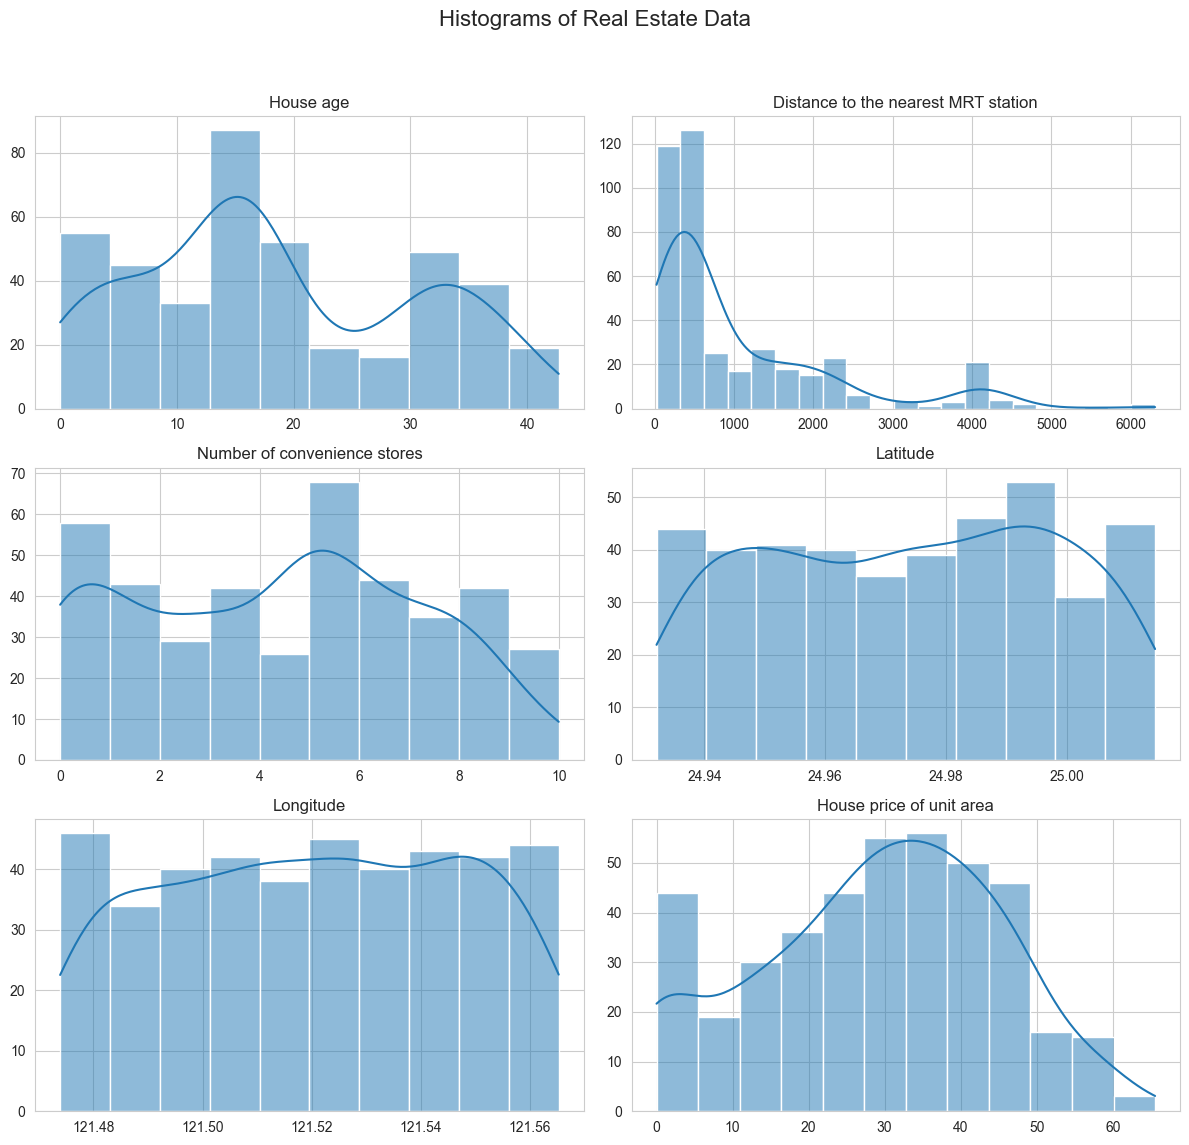

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16)

cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<h3><B>2.2 Scatter Plots with House Price of Unit Area.</b></h3>

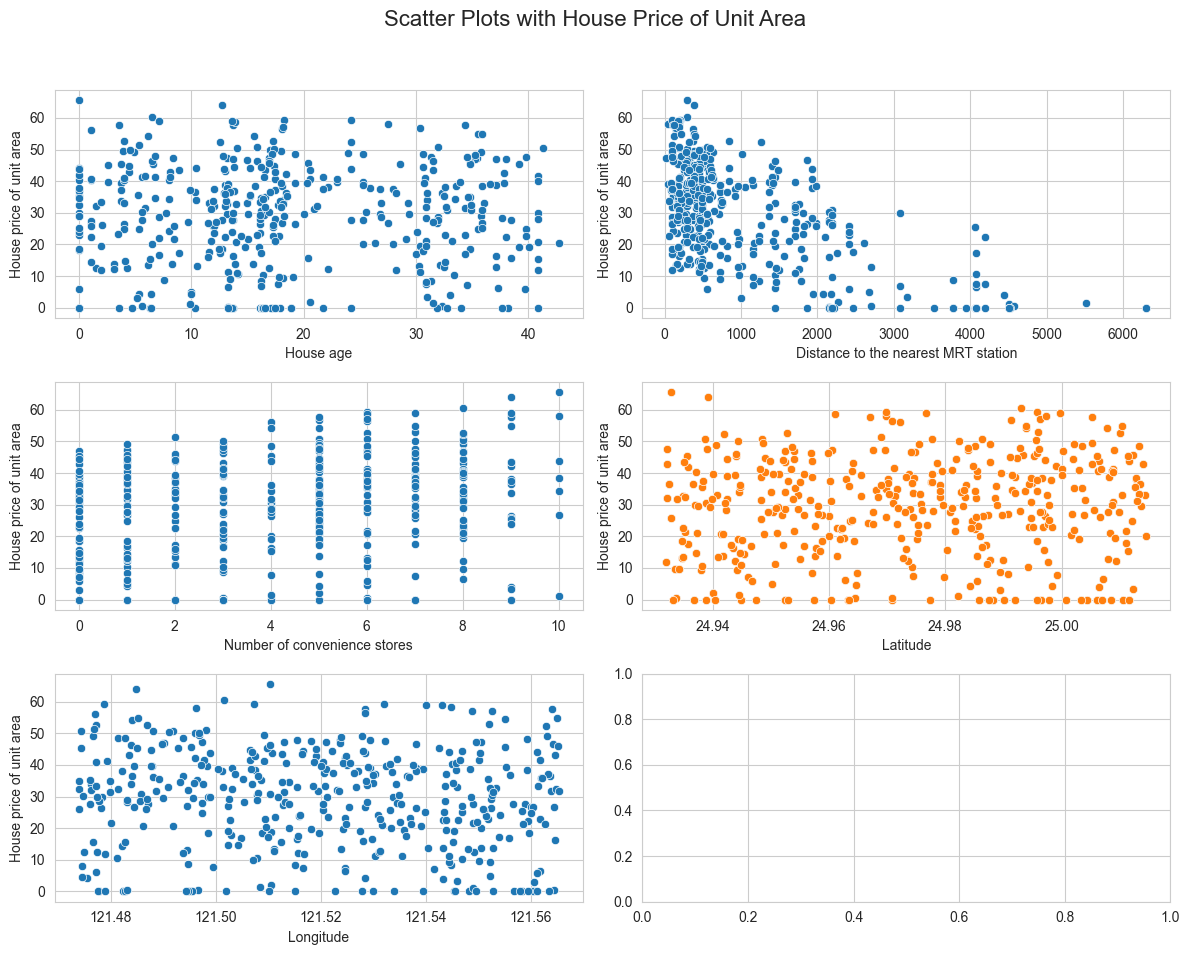

In [6]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price
sns.scatterplot(data=df, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=df, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=df, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=df, x='Latitude', y='House price of unit area', ax=axes[1, 1])
sns.scatterplot(data=df, x='Latitude', y='House price of unit area', ax=axes[1, 1])
sns.scatterplot(data=df, x='Longitude', y='House price of unit area', ax=axes[2, 0])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<h2><B>3. Correlation Matrix.</b></h2> 

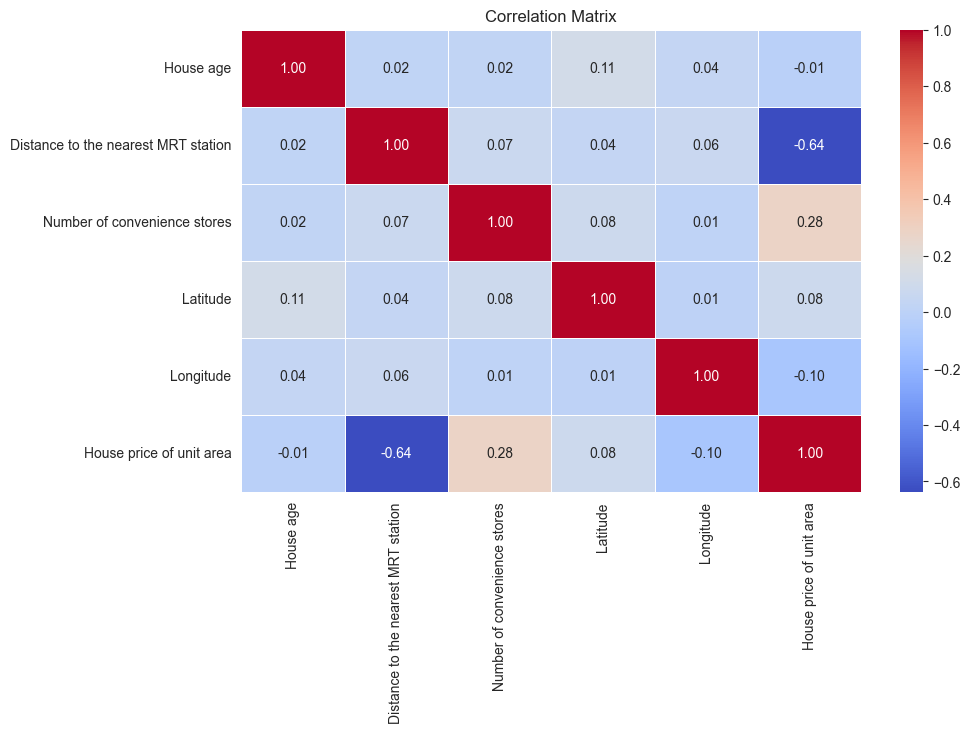

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [7]:

numeric_data = df.select_dtypes(include=[float, int])

correlation_matrix = numeric_data.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


print(correlation_matrix)


<h2><B>4. Linear Regression Model.</b></h2> <br>
<h3><B>4.1 Model Training and Testing.</b></h3>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


features = ['House age','Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

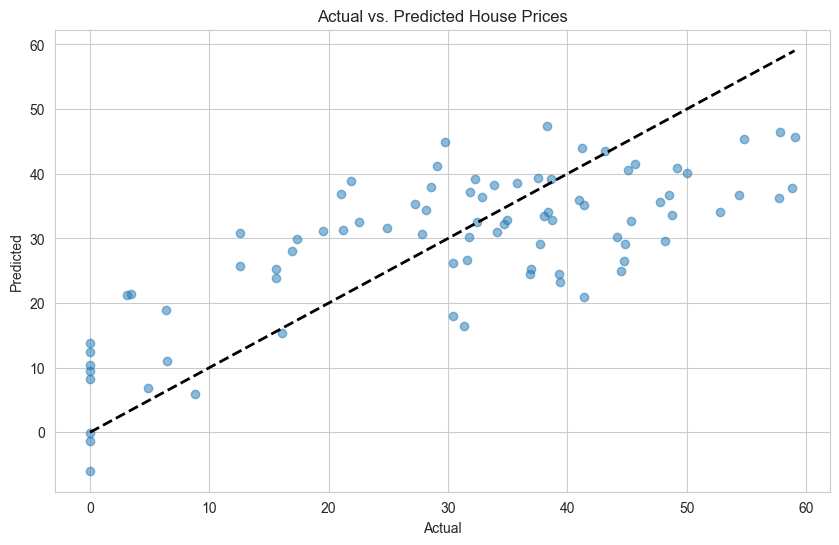

In [9]:
# Making predictions using the linear regression model
y_pred_lr = model.predict(X_test)

# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

<h2><B>5. Predicting House Price On User Input.</b></h2>

In [10]:
# Function to predict house price based on user input
def predict_house_price(model, house_age, distance_to_mrt, num_convenience_stores, latitude, longitude):
    input_data = pd.DataFrame({
        'House age': [house_age],
        'Distance to the nearest MRT station': [distance_to_mrt],
        'Number of convenience stores': [num_convenience_stores],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })
    predicted_price = model.predict(input_data)
    return predicted_price[0]

# Example usage
house_age = float(input("Enter house age: "))
distance_to_mrt = float(input("Enter distance to the nearest MRT station: "))
num_convenience_stores = int(input("Enter number of convenience stores: "))
latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))

predicted_price = predict_house_price(model, house_age, distance_to_mrt, num_convenience_stores, latitude, longitude)
print(f"Predicted House Price of Unit Area: {predicted_price}")


Predicted House Price of Unit Area: 72.83401418751828
